In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Let's pull the candidates info 

house_cand = pd.read_csv("Train.csv")
print(house_cand.columns)

total_winners = house_cand[house_cand["GE WINNER INDICATOR"] == 1].count()[0]
house_cand.head()


Index(['Cand_Name', 'FEC ID#', 'Cand_Incumbent_Challenger_Open_Seat',
       'Total_Receipt', 'Total_Disbursement', 'Cand_State',
       'Individual_Contribution', 'Other_Committee_Contribution',
       'Party_Committee_Contribution', 'STATE ABBREVIATION',
       ...
       'Cand_Office_Dist_45.0', 'Cand_Office_Dist_46.0',
       'Cand_Office_Dist_47.0', 'Cand_Office_Dist_48.0',
       'Cand_Office_Dist_49.0', 'Cand_Office_Dist_50.0',
       'Cand_Office_Dist_51.0', 'Cand_Office_Dist_52.0',
       'Cand_Office_Dist_53.0', 'Cand_Office_Dist'],
      dtype='object', length=132)


,Cand_Name,FEC ID#,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,Cand_State,Individual_Contribution,Other_Committee_Contribution,Party_Committee_Contribution,STATE ABBREVIATION,...,Cand_Office_Dist_45.0,Cand_Office_Dist_46.0,Cand_Office_Dist_47.0,Cand_Office_Dist_48.0,Cand_Office_Dist_49.0,Cand_Office_Dist_50.0,Cand_Office_Dist_51.0,Cand_Office_Dist_52.0,Cand_Office_Dist_53.0,Cand_Office_Dist
0,"RAASCH, WAYNE GORDON",H6TX27068,CHALLENGER,0.00,0.00,TX,0.00,0.00,0.0,TX,...,0,0,0,0,0,0,0,0,0,27.0
1,"MICHAELS, BARRY",H6NV03014,OPEN,0.00,0.00,NV,0.00,0.00,0.0,NV,...,0,0,0,0,0,0,0,0,0,3.0
2,"LIEBERMAN, RICHARD",H4LA06062,CHALLENGER,0.00,0.00,LA,0.00,0.00,0.0,LA,...,0,0,0,0,0,0,0,0,0,6.0
3,"GARRETT, GREGORY KEITH",H6TX19123,OPEN,108161.18,108161.18,TX,57940.00,0.00,0.0,TX,...,0,0,0,0,0,0,0,0,0,19.0
4,"JORDAN, JAMES D.",H6OH04082,INCUMBENT,733416.16,422966.51,OH,370033.49,354896.05,4000.0,OH,...,0,0,0,0,0,0,0,0,0,4.0


In [15]:
top_ind_contri = house_cand.loc[house_cand.groupby(['STATE ABBREVIATION',"Cand_Office_Dist"])["Individual_Contribution"].idxmax()]
no_of_states = top_ind_contri.shape[0]
no_of_winner = top_ind_contri[top_ind_contri["GE WINNER INDICATOR"] == 1].count()[0]
prob_ind_contri = no_of_winner/no_of_states
print("Probability of a candidate winning if he/she has highest individual contribution in their state: ",prob_ind_contri)

Probability of a candidate winning if he/she has highest individual contribution in their state:  0.9027149321266968


In [16]:
other_committee_contri = house_cand.loc[house_cand.groupby(['STATE ABBREVIATION',"Cand_Office_Dist"])["Other_Committee_Contribution"].idxmax()]
no_of_winner = other_committee_contri[other_committee_contri["GE WINNER INDICATOR"] == 1].count()[0]
prob_other_comm = no_of_winner/no_of_states
print("Probability of a candidate winning if he/she has highest Other committee contribution in their state: ",prob_other_comm)


Probability of a candidate winning if he/she has highest Other committee contribution in their state:  0.9411764705882353


In [17]:
total_disbur = house_cand.loc[house_cand.groupby(['STATE ABBREVIATION',"Cand_Office_Dist"])["Total_Disbursement"].idxmax()]
no_of_winner = total_disbur[total_disbur["GE WINNER INDICATOR"] == 1].count()[0]
prob_total_disbur = no_of_winner/no_of_states
print("Probability of a candidate winning if he/she has highest total disbursement in their state: ",prob_total_disbur)


Probability of a candidate winning if he/she has highest total disbursement in their state:  0.920814479638009


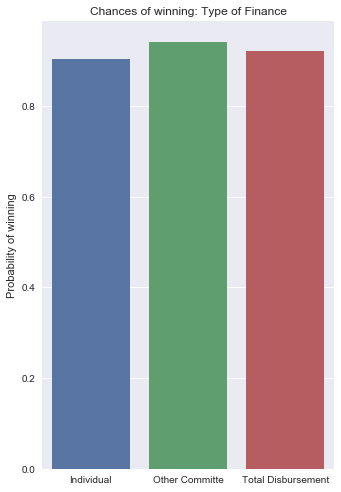

In [18]:
sns.set()
plot = pd.DataFrame({"Candidate Status":["Individual","Other Committe","Total Disbursement"],"Probability of winning":[prob_ind_contri,prob_other_comm,prob_total_disbur]})
g = sns.factorplot(x="Candidate Status", y="Probability of winning",data=plot, kind='bar',size=7, aspect=0.7)

for ax in g.axes.flatten():
#     ax.legend()
    ax.set_xlabel('')
    ax.set_title('Chances of winning: Type of Finance')
    g.savefig("finance.jpg",dpi=1000)
